Implements a basic 1D quantum mechanics simulator in Julia

In [8]:
using Plots, LaTeXStrings

In [4]:
x = range(-10, 10, length = 10000)

delta_x = x[begin + 1] - x[begin]

0.0020002000200012304

In [5]:
function norm(phi) # . means that the function proceeds element-wise
    # abs2 return the square of the absolute value
    norm = sum(abs2, phi) * delta_x
    phi / sqrt(norm)
end

norm (generic function with 1 method)

In [15]:
function complex_plot(x, y, probability = true; kwargs... ) # fix this later
    real_comp = real.(y)
    imag_comp = imag.(y)
    # Look at how to handle *args and **kwargs equivalents in julia
    
    plot(xlims = (-2,2))

    a = plot(x, real_comp, label = "Re"; kwargs...)
    b = plot(x, imag_comp, label = "Im"; kwargs...)

    if probability
        p = plot(x , abs.(y), label = L"\sqrt{P}")
        gui(p)
        return a, b, p
        # return p # Mutates each time, so p holds a and b as well
    else
        gui(b)
        return a, b
        # return b
    end
end

complex_plot (generic function with 2 methods)

In [7]:
function wave_packet(pos = 0, mom = 0, sigma = 0.2)
    # Check if any changes for second exp need to be made for complex numbers
    # Look into @. macro
    norm( exp.(-im * mom .* x) .* exp.(-1 .* (x .- pos).^2 ./ sigma^2) )
end

wave_packet (generic function with 4 methods)

In [9]:
function d_dx2(phi, x=x)
    dphi_dx2 = -2 * phi
    dphi_dx2[begin:end-1] += phi[begin+1:end]
    dphi_dx2[begin+1:end] += phi[begin:end-1]

    dphi_dx2 / delta_x
end

function d_dt(phi, h = 1, m = 100, V = 0)
    im * h / (2 * m) * d_dx2(phi) - im * V * phi / h
end

d_dt (generic function with 4 methods)

In [ ]:
function euler_method(phi, dt; kwargs...)
    phi + dt * d_dt(phi, kwargs...)
end

function rk4(phi, dt; kwargs...)
    k1 = d_dt(phi; kwargs...)
    k2 = d_dt(phi + dt/2 * k1; kwargs...)
    k3 = d_dt(phi + dt/2 * k2; kwargs...)
    k4 = d_dt(phi + dt * k3; kwargs...)

    phi + dt/6 * (k1 + 2k2 + 2k3 + k4)
end

In [ ]:
function simulate(phi_sim,
                  method = "rk4",
                  V = 0,
                  steps = 100000,
                  dt = 1e-1,
                  condition = nothing,
                  normalize = true,
                  save_every = 100)

    # SEE about taking if method statements out, and replacing with a single
    # check and then assigning function to some integrator_method
    simulation_steps = [copy(phi_sim)]
    
    for i in 1:steps
        if method == "euler"
            phi_sim = euler(phi_sim, dt, V = V)
        elseif method == "rk4"
            phi_sim = rk4(phi_sim, dt, V = V)
        else
            println("Method ", method, " unknown")
        end

        if condition
            phi_sim = condition(phi_sim)
        end
        if normalize
            phi_sim = norm(phi_sim)
        end
        if save_every != nothing && i % save_every == 0
            push!(simulation_steps, copy(phi_sim))
        end
    end

    simulation_steps
end

In [ ]:
sim_free = simulate(wave_packet(), steps = 200000, plot_every = nothing, save_every = 1000)

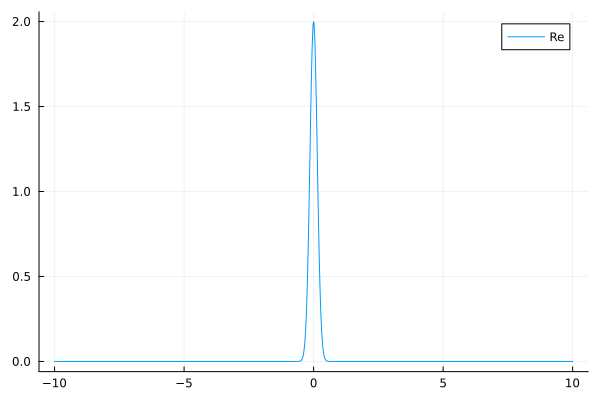

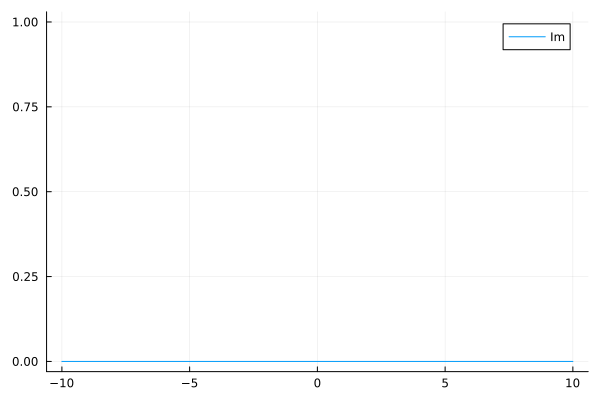

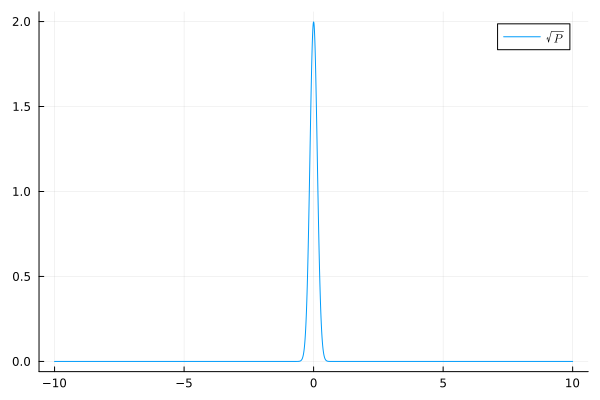

In [23]:
a, b, c = complex_plot(x, wave_packet())